# Sequence to Sequence (seq2seq) Recurrent Neural Network (RNN) for Time Series Prediction

The goal of this project of mine is to bring users to try and experiment with the seq2seq neural network architecture. This is done by solving different simple toy problems about signal prediction. Normally, seq2seq architectures may be used for other more sophisticated purposes than for signal prediction, let's say, language modeling, but this project is an interesting tutorial in order to then get to more complicated stuff. 

In this project are given 5 exercises of gradually increasing difficulty. I take for granted that the public already have at least knowledge of basic RNNs and how can they be shaped into an encoder and a decoder of the most simple form (without attention). To learn more about RNNs in TensorFlow, you may want to visit this other project of mine about that: https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition

The current project is a series of example I have first built in French, but I haven't got the time to generate all the charts anew with proper English text. I have built this project for the practical part of the third hour of a "master class" conference that I gave at the WAQ (Web At Quebec) in March 2017: 
https://webaquebec.org/classes-de-maitre/deep-learning-avec-tensorflow

You can find the French, original, version of this project in the French Git branch: https://github.com/guillaume-chevalier/seq2seq-signal-prediction/tree/francais

## How to use this ".ipynb" Python notebook ?

Except the fact I made available an ".py" Python version of this tutorial within the repository, it is more convenient to run the code inside the notebook. The ".py" code exported feels a bit raw as an exportation. 

To run the notebook, you must have installed Jupyter Notebook or iPython Notebook. To open the notebook, you must write `jupyter notebook` or `iPython notebook` in command line (from the folder containing the notebook once downloaded, or a parent folder). It is then that the notebook application (IDE) will open in your browser as a local server and it will be possible to open the `.ipynb` notebook file and to run code cells with `CTRL+ENTER` and `SHIFT+ENTER`, it is also possible to restart the kernel and run all cells at once with the menus. Note that this is interesting since it is possible to make that IDE run as hosted on a cloud server with a lot of GPU power while you code through the browser.

## Exercises

Note that the dataset changes in function of the exercice. Most of the time, you will have to edit the neural networks' training parameter to succeed in doing the exercise, but at a certain point, changes in the architecture itself will be asked and required. The datasets used for this exercises are found in `datasets.py`.

### Exercise 1

In theory, it is possible to create a perfect prediction of the signal for this exercise. The neural network's parameters has been set to acceptable values for a first training, so you may pass this exercise by running the code without even a change. Your first training might get predictions like that (in yellow), but it is possible to do a lot better with proper parameters adjustments:

<img src="images/E1.png" />

Note: the neural network sees only what is to the left of the chart and is trained to predict what is at the right (predictions in yellow). 

We have 2 time series at once to predict, which are tied together. That means our neural network processes multidimensional data. A simple example would be to receive as an argument the past values of multiple stock market symbols in order to predict the future values of all those symbols with the neural network, which values are evolving together in time. That is what we will do in the exercise 6. 


### Exercise 2

Here, rather than 2 signals in parallel to predict, we have only one, for simplicity. HOWEVER, this signal is a superposition of two sine waves of varying wavelenght and offset (and restricted to a particular min and max limit of wavelengts). 

In order to finish this exercise properly, you will need to edit the neural network's hyperparameters. As an example, here is what is possible to achieve as a predction with those better (but still unperfect) training hyperparameters: 

- `nb_iters = 2500`
- `batch_size = 50`
- `hidden_dim = 35`
<img src="images/E2.png" />

Here are predictions achieved with a bigger neural networks with 3 stacked recurrent cells and a width of 500 hidden units for each of those cells: 

<img src="images/E2_1.png" />

<img src="images/E2_2.png" />

<img src="images/E2_3.png" />

<img src="images/E2_4.png" />

Note that it would be possible to obtain better results with a smaller neural network, provided better training hyperparameters and a longer training, adding dropout, and on. 

### Exercise 3

This exercise is similar to the previous one, except that the input data given to the encoder is noisy. The expected output is not noisy. This makes the task a bit harder. Here is a good example of what a training example (and a prediction) could now looks like :

<img src="images/E3.png" />

Therefore the neural network is brought to denoise the signal to interpret its future smooth values. Here are some example of better predictions on this version of the dataset : 

<img src="images/E3_1.png" />

<img src="images/E3_2.png" />

<img src="images/E3_3.png" />

<img src="images/E3_4.png" />

Similarly as I said for the exercise 2, it would be possible here too to obtain better results. Note that it would also have been possible to ask you to predict to reconstruct the denoised signal from the noisy input (and not predict the future values of it). This would have been called a "denoising autoencoder", this type of architecture is also useful for data compression, such as manipulating images. 

### Exercise 4

The 4th exercise is about editing the neural architecture to make it look like that: 

<img src="https://esciencegroup.files.wordpress.com/2016/03/seq2seq.jpg?w=625" />

That is, introducing feedback in the decoder, where outputs are fed anew to the next time step to be decoded. This could be compared to hearing oneself's voice upon speaking. Haven't you ever felt how speaking in a microphone is disbalancing at first ? It is because of an offset in the time of such a recurrence. 

Right now, our encoder and decoder use the same cell, but with two separate, different sets of "shared" weights. This is done by the call to `tf.nn.seq2seq.basic_rnn_seq2seq`, however, to achieve what we want, we shall change our code to not use that function. 

A simple way to do the edits would be to call the recurrent cells on the new time steps (indexes) of the encoder and decoder lists with two different cells with different names. The `__call__` function of the cells (that is, the parenthesis operator) could be used. You might find  more details here: 
- The section "`Base interface for all RNN Cells`" : https://www.tensorflow.org/api_guides/python/contrib.rnn 
- "`tf.nn.seq2seq.basic_rnn_seq2seq`", line 148 (in date of April 2017): https://github.com/petewarden/tensorflow_ios/blob/master/tensorflow/python/ops/seq2seq.py#L148
- The comment "`This builds an unrolled LSTM for tutorial purposes only.`", line 143 (in date of April 2017): https://github.com/tensorflow/models/blob/master/tutorials/rnn/ptb/ptb_word_lm.py#L143

Although doing that replacement seems only formative, it is this way that TensorFlow users can keep up with building more complicated neural architectures, such as plugging an attention RNN decoder on top of a CNN to convert an image to a textual description of it, for example. To learn more about attention mechanisms in RNNs, you might want to watch this [talk](https://www.youtube.com/watch?v=QuvRWevJMZ4) to tackle the theory.

### Exercise 5

This exercise is much harder than the previous ones and is built more as a suggestion. It is to predict the future value of the Bitcoin's price. We have here some daily market data of the bitcoin's value, that is, BTC/USD and BTC/EUR. This is not enough to build a good predictor, at least having data precise at the minute level, or second level, would be more interesting. Here is a prediction made on the actual future values, the neural network has not been trained on the future values shown here and this is a legitimate prediction, given a well-enough model trained on the task: 

<img src="images/E5.png" />

Disclaimer: this prediction of the future values was really good and you should not expect predictions to be always that good using as few data as actually (side note: the other prediction charts in this project are all "average" except this one). Your task for this exercise is to plug the model on more valuable financial data in order to make more accurate predictions. Let me remind you that I provided the code for the datasets in "datasets.py", but that should be replaced for predicting accurately the Bitcoin. 

It would be possible to improve the input dimensions of your model that accepts (BTC/USD and BTC/EUR). As an example, you could create additionnal input dimensions/streams which could contain meteo data and more financial data, such as the S&P 500, the Dow Jones, and on. Other more creative input data could be sine waves (or other-type-shaped waves such as saw waves or triangles or two signals for `cos` and `sin`) representing the fluctuation of minutes, hours, days, weeks, months, years, moon cycles, and on. This could be combined with a Twitter sentiment analysis about the word "Bitcoin" in tweets in order to have another input signal which is more human-based and abstract. Actually, some libraries exists to convert text to a sentiment value, and there would also be the neural network end-to-end approach (but that would be a way more complicated setup). It is also interesting to know where is the bitcoin most used: http://images.google.com/search?tbm=isch&q=bitcoin+heatmap+world

With all the above-mentionned examples, it would be possible to have all of this as input features, at every time steps: (BTC/USD, BTC/EUR, Dow_Jones, SP_500, hours, days, weeks, months, years, moons, meteo_USA, meteo_EUROPE, Twitter_sentiment). Finally, there could be those two output features, or more: (BTC/USD, BTC/EUR). 

This prediction concept can apply to many things, such as meteo prediction and other types of shot-term and mid-term statistical predictions. 

## To change which exercise you are doing, change the value of the following "exercise" variable:


In [1]:

exercise = 1  # Possible values: 1, 2, 3, 4 or 5. 

from datasets import generate_x_y_data_v1, generate_x_y_data_v2, generate_x_y_data_v3, generate_x_y_data_v4 

# We choose which data function to use below, in function of the exericse. 
if exercise == 1:
    generate_x_y_data = generate_x_y_data_v1
if exercise == 2:
    generate_x_y_data = generate_x_y_data_v2
if exercise in [3, 4]:
    # exercises 3 and 4 uses the same data. 
    generate_x_y_data = generate_x_y_data_v3
if exercise == 5:  
    generate_x_y_data = generate_x_y_data_v4


In [2]:

import tensorflow as tf  # Version 1.0 or 0.12
import numpy as np
import matplotlib.pyplot as plt

# This is for the notebook to generate inline matplotlib 
# charts rather than to open a new window every time: 
%matplotlib inline


## Neural network's hyperparameters

In [3]:

sample_x, sample_y = generate_x_y_data(isTrain=True, batch_size=3)
print("Dimensions of the dataset for 3 X and 3 Y training examples : ")
print(sample_x.shape)
print(sample_y.shape)
print("(seq_length, batch_size, output_dim)")

# Internal neural network parameters
seq_length = sample_x.shape[0]  # Time series will have the same past and future (to be predicted) lenght. 
batch_size = 5  # Low value used for live demo purposes - 100 and 1000 would be possible too, crank that up!

output_dim = input_dim = sample_x.shape[-1]  # Output dimension (e.g.: multiple signals at once, tied in time)
hidden_dim = 12  # Count of hidden neurons in the recurrent units. 
layers_stacked_count = 2  # Number of stacked recurrent cells, on the neural depth axis. 

# Optmizer: 
learning_rate = 0.007  # Small lr helps not to diverge during training. 
nb_iters = 150  # How many times we perform a training step (therefore how many times we show a batch). 
lr_decay = 0.92  # default: 0.9 . Simulated annealing.
momentum = 0.5  # default: 0.0 . Momentum technique in weights update
lambda_l2_reg = 0.003  # L2 regularization of weights - avoids overfitting


Dimensions of the dataset for 3 X and 3 Y training examples : 
(10, 3, 2)
(10, 3, 2)
(seq_length, batch_size, output_dim)


## Definition of the seq2seq neuronal architecture

<img src="https://www.tensorflow.org/images/basic_seq2seq.png" />

Comparatively to what we see in the image, our neural network deals with signal rather than letters. Also, we don't have the feedback mechanism yet, which is to be implemented in the exercise 4. We do have the "GO" token however. 

In [4]:

# Backward compatibility for TensorFlow's version 0.12: 
try:
    tf.nn.seq2seq = tf.contrib.legacy_seq2seq
    tf.nn.rnn_cell = tf.contrib.rnn
    tf.nn.rnn_cell.GRUCell = tf.contrib.rnn.GRUCell
    print("TensorFlow's version : 1.0 (or more)")
except: 
    print("TensorFlow's version : 0.12")


TensorFlow's version : 1.0 (or more)


In [5]:

tf.reset_default_graph()
# sess.close()
sess = tf.InteractiveSession()

with tf.variable_scope('Seq2seq'):

    # Encoder: inputs
    enc_inp = [
        tf.placeholder(tf.float32, shape=(None, input_dim), name="inp_{}".format(t))
           for t in range(seq_length)
    ]

    # Decoder: expected outputs
    expected_sparse_output = [
        tf.placeholder(tf.float32, shape=(None, output_dim), name="expected_sparse_output_".format(t))
          for t in range(seq_length)
    ]
    
    # Give a "GO" token to the decoder. 
    # You might want to revise what is the appended value "+ enc_inp[:-1]". 
    dec_inp = [ tf.zeros_like(enc_inp[0], dtype=np.float32, name="GO") ] + enc_inp[:-1]

    # Create a `layers_stacked_count` of stacked RNNs (GRU cells here). 
    cells = []
    for i in range(layers_stacked_count):
        with tf.variable_scope('RNN_{}'.format(i)):
            cells.append(tf.nn.rnn_cell.GRUCell(hidden_dim))
            # cells.append(tf.nn.rnn_cell.BasicLSTMCell(...))
    cell = tf.nn.rnn_cell.MultiRNNCell(cells)
    
    # For reshaping the input and output dimensions of the seq2seq RNN: 
    w_in = tf.Variable(tf.random_normal([input_dim, hidden_dim]))
    b_in = tf.Variable(tf.random_normal([hidden_dim], mean=1.0))
    w_out = tf.Variable(tf.random_normal([hidden_dim, output_dim]))
    b_out = tf.Variable(tf.random_normal([output_dim]))
    
    reshaped_inputs = [tf.nn.relu(tf.matmul(i, w_in) + b_in) for i in enc_inp]
    
    # Here, the encoder and the decoder uses the same cell, HOWEVER,
    # the weights aren't shared among the encoder and decoder, we have two
    # sets of weights created under the hood according to that function's def. 
    dec_outputs, dec_memory = tf.nn.seq2seq.basic_rnn_seq2seq(
        enc_inp, 
        dec_inp, 
        cell
    )
    
    output_scale_factor = tf.Variable(1.0, name="Output_ScaleFactor")
    # Final outputs: with linear rescaling similar to batch norm, 
    # but without the "norm" part of batch normalization hehe. 
    reshaped_outputs = [output_scale_factor*(tf.matmul(i, w_out) + b_out) for i in dec_outputs]


In [6]:

# Training loss and optimizer

with tf.variable_scope('Loss'):
    # L2 loss
    output_loss = 0
    for _y, _Y in zip(reshaped_outputs, expected_sparse_output):
        output_loss += tf.reduce_mean(tf.nn.l2_loss(_y - _Y))
        
    # L2 regularization (to avoid overfitting and to have a  better generalization capacity)
    reg_loss = 0
    for tf_var in tf.trainable_variables():
        if not ("Bias" in tf_var.name or "Output_" in tf_var.name):
            reg_loss += tf.reduce_mean(tf.nn.l2_loss(tf_var))
            
    loss = output_loss + lambda_l2_reg * reg_loss

with tf.variable_scope('Optimizer'):
    optimizer = tf.train.RMSPropOptimizer(learning_rate, decay=lr_decay, momentum=momentum)
    train_op = optimizer.minimize(loss)


## Training of the neural net

In [7]:

def train_batch(batch_size):
    """
    Training step that optimizes the weights 
    provided some batch_size X and Y examples from the dataset. 
    """
    X, Y = generate_x_y_data(isTrain=True, batch_size=batch_size)
    feed_dict = {enc_inp[t]: X[t] for t in range(len(enc_inp))}
    feed_dict.update({expected_sparse_output[t]: Y[t] for t in range(len(expected_sparse_output))})
    _, loss_t = sess.run([train_op, loss], feed_dict)
    return loss_t

def test_batch(batch_size):
    """
    Test step, does NOT optimizes. Weights are frozen by not
    doing sess.run on the train_op. 
    """
    X, Y = generate_x_y_data(isTrain=False, batch_size=batch_size)
    feed_dict = {enc_inp[t]: X[t] for t in range(len(enc_inp))}
    feed_dict.update({expected_sparse_output[t]: Y[t] for t in range(len(expected_sparse_output))})
    loss_t = sess.run([loss], feed_dict)
    return loss_t[0]


# Training
train_losses = []
test_losses = []

sess.run(tf.global_variables_initializer())
for t in range(nb_iters+1):
    train_loss = train_batch(batch_size)
    train_losses.append(train_loss)
    
    if t % 10 == 0: 
        # Tester
        test_loss = test_batch(batch_size)
        test_losses.append(test_loss)
        print("Step {}/{}, train loss: {}, \tTEST loss: {}".format(t, nb_iters, train_loss, test_loss))

print("Fin. train loss: {}, \tTEST loss: {}".format(train_loss, test_loss))


Step 0/150, train loss: 31.851158142089844, 	TEST loss: 8.904069900512695
Step 10/150, train loss: 1.8771555423736572, 	TEST loss: 1.3146893978118896
Step 20/150, train loss: 0.9911352396011353, 	TEST loss: 0.9987154603004456
Step 30/150, train loss: 1.0281240940093994, 	TEST loss: 1.334771990776062
Step 40/150, train loss: 1.6072180271148682, 	TEST loss: 0.8452374935150146
Step 50/150, train loss: 0.8405464887619019, 	TEST loss: 0.6293014287948608
Step 60/150, train loss: 1.137873649597168, 	TEST loss: 0.6797339916229248
Step 70/150, train loss: 0.5543531179428101, 	TEST loss: 0.5436128973960876
Step 80/150, train loss: 0.8384451270103455, 	TEST loss: 1.013554573059082
Step 90/150, train loss: 0.8856289386749268, 	TEST loss: 0.8184834718704224
Step 100/150, train loss: 0.6228733658790588, 	TEST loss: 0.6126127243041992
Step 110/150, train loss: 0.4799271523952484, 	TEST loss: 0.4779765009880066
Step 120/150, train loss: 0.5184631943702698, 	TEST loss: 0.6024582982063293
Step 130/150, 

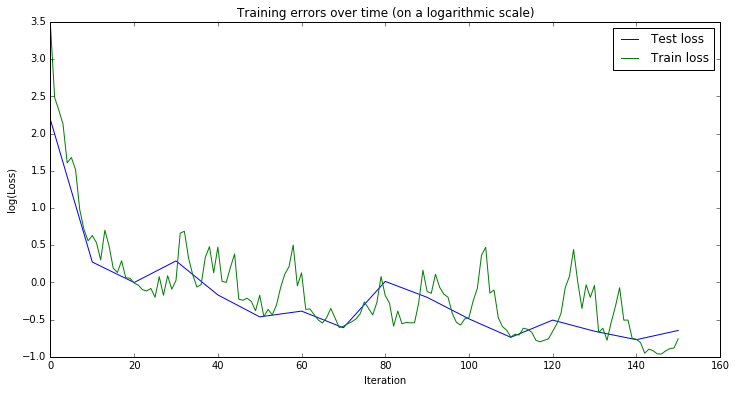

In [8]:

# Plot loss over time:
plt.figure(figsize=(12, 6))
plt.plot(
    np.array(range(0, len(test_losses)))/float(len(test_losses)-1)*(len(train_losses)-1), 
    np.log(test_losses), 
    label="Test loss"
)
plt.plot(
    np.log(train_losses), 
    label="Train loss"
)
plt.title("Training errors over time (on a logarithmic scale)")
plt.xlabel('Iteration')
plt.ylabel('log(Loss)')
plt.legend(loc='best')
plt.show()


Let's visualize 5 predictions with our signals:


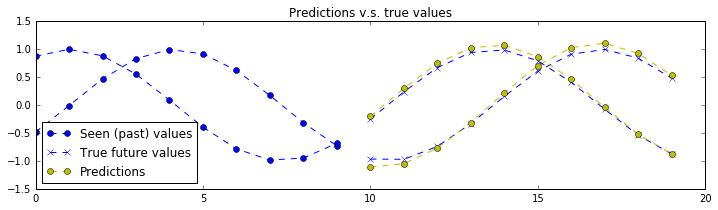

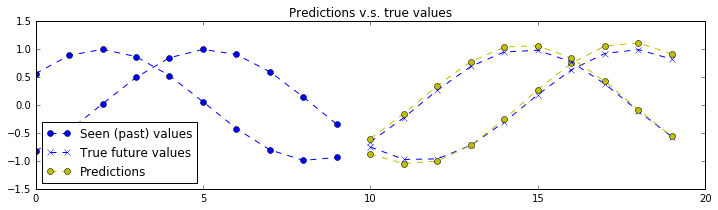

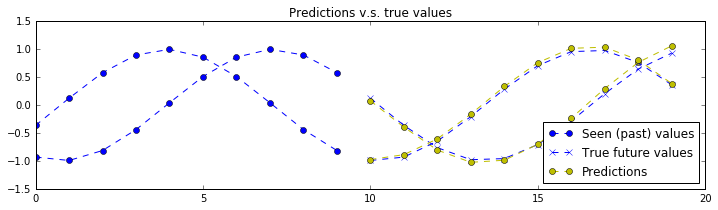

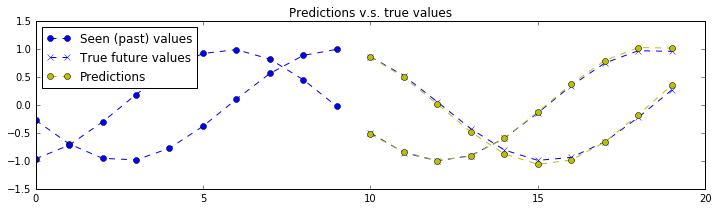

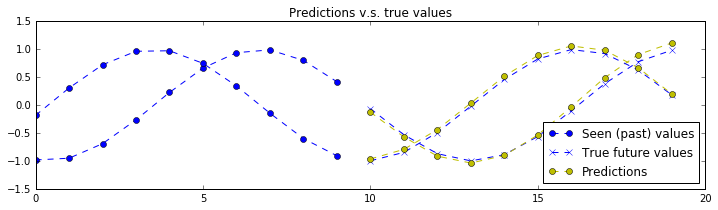

Reminder: the signal can contain many dimensions at once.
In that case, signals have the same color.
In reality, we could imagine multiple stock market symbols evolving,
tied in time together and seen at once by the neural network.


In [9]:
# Test
nb_predictions = 5
print("Let's visualize {} predictions with our signals:".format(nb_predictions))

X, Y = generate_x_y_data(isTrain=False, batch_size=nb_predictions)
feed_dict = {enc_inp[t]: X[t] for t in range(seq_length)}
outputs = np.array(sess.run([reshaped_outputs], feed_dict)[0])

for j in range(nb_predictions): 
    plt.figure(figsize=(12, 3))
    
    for k in range(output_dim):
        past = X[:,j,k]
        expected = Y[:,j,k]
        pred = outputs[:,j,k]
        
        label1 = "Seen (past) values" if k==0 else "_nolegend_"
        label2 = "True future values" if k==0 else "_nolegend_"
        label3 = "Predictions" if k==0 else "_nolegend_"
        plt.plot(range(len(past)), past, "o--b", label=label1)
        plt.plot(range(len(past), len(expected)+len(past)), expected, "x--b", label=label2)
        plt.plot(range(len(past), len(pred)+len(past)), pred, "o--y", label=label3)
    
    plt.legend(loc='best')
    plt.title("Predictions v.s. true values")
    plt.show()

print("Reminder: the signal can contain many dimensions at once.")
print("In that case, signals have the same color.")
print("In reality, we could imagine multiple stock market symbols evolving,")
print("tied in time together and seen at once by the neural network.")

## Author

Guillaume Chevalier

- https://ca.linkedin.com/in/chevalierg
- https://twitter.com/guillaume_che
- https://github.com/guillaume-chevalier/


In [10]:
# Let's convert this notebook to a README for the GitHub project's title page:
!jupyter nbconvert --to markdown seq2seq.ipynb
!mv seq2seq.md README.md

[NbConvertApp] Converting notebook seq2seq.ipynb to markdown
[NbConvertApp] Support files will be in seq2seq_files/
[NbConvertApp] Making directory seq2seq_files
[NbConvertApp] Making directory seq2seq_files
[NbConvertApp] Making directory seq2seq_files
[NbConvertApp] Making directory seq2seq_files
[NbConvertApp] Making directory seq2seq_files
[NbConvertApp] Making directory seq2seq_files
[NbConvertApp] Writing 21717 bytes to seq2seq.md
